
An online retail store is trying to understand the various customer purchase patterns for their
firm, this project is  to give enough evidence based insights to provide the same.


Create a project report in a pdf format that will consist of the following: a. Problem Statement b. Project Objective c. Data Description d. Data Pre-processing Steps and Inspiration e. Choosing the Algorithm for the Project f. Motivation and Reasons For Choosing the Algorithm g. Assumptions h. Model Evaluation and Techniques i. Inferences from the Same j. Future Possibilities of the Project

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time
import datetime as dt

from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler

load data

In [2]:
data = pd.read_csv(r'C:\Users\P Kalyani Jyothirmai\Desktop\OnlineRetail (3).csv',encoding = 'latin')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


veiwing data information

In [3]:
print(data.shape)

(541909, 8)


In [4]:
# checking null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.dropna(axis = 0, inplace = True)
print(data.shape)   #removing the null values

(406829, 8)


Data Processing and Cleansing

Now we can observe that difference before droping null values and after droping null values

<Axes: >

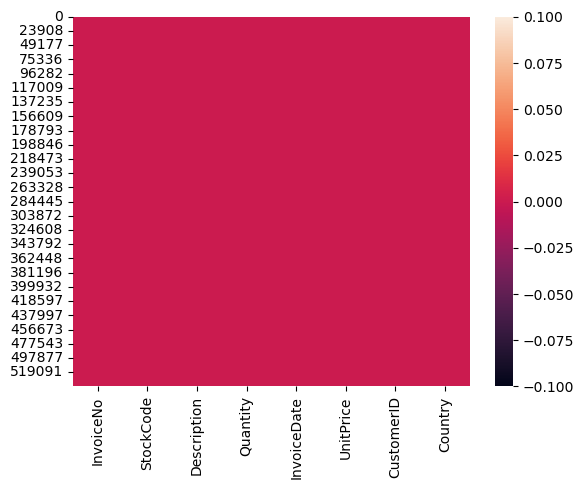

In [6]:
sns.heatmap(data.isnull())

In [57]:
data.corr()

C:\Users\P Kalyani Jyothirmai\AppData\Local\Temp\ipykernel_36860\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Quantity,UnitPrice,CustomerID,TotalQuantity,Month,Year
Quantity,1.000000,-0.004561,-0.006411,0.908812,-0.004006,0.001595
UnitPrice,-0.004561,1.000000,-0.010863,0.081646,-0.005171,-0.000191
CustomerID,-0.006411,-0.010863,1.000000,-0.004104,0.030417,-0.036352
TotalQuantity,0.908812,0.081646,-0.004104,1.000000,-0.002733,0.000431
Month,-0.004006,-0.005171,0.030417,-0.002733,1.000000,-0.340655
Year,0.001595,-0.000191,-0.036352,0.000431,-0.340655,1.000000


Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [7]:
data = data[data['Quantity']>=0]
data = data[data['UnitPrice']>=0]

print(data.shape)

(397924, 8)


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [9]:
data['TotalQuantity'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Now we will look at the details of the countries through which most of the orders were placed

In [10]:
print(data[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           354345
Germany                    9042
France                     8342
EIRE                       7238
Spain                      2485
Netherlands                2363
Belgium                    2031
Switzerland                1842
Portugal                   1462
Australia                  1185
Norway                     1072
Italy                       758
Channel Islands             748
Finland                     685
Cyprus                      614
Sweden                      451
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      248
Unspecified                 244
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European

<Axes: >

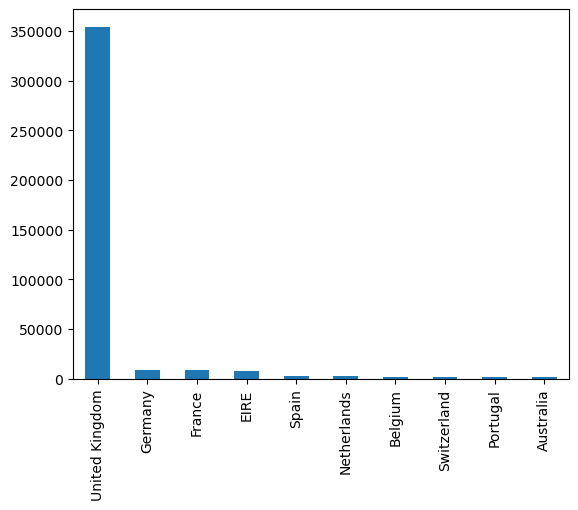

In [11]:
'''Top 5 countries sales count wise in the cleaned up data.'''
data['Country'].value_counts().head(10).plot(kind='bar')

In [12]:
data[data['TotalQuantity']==data['TotalQuantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6


In [13]:
items = data['Description'].value_counts().head()
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: Description, dtype: int64


In [14]:
print(data[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


In [15]:
print(data[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


In [16]:
print(data[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


RFM Analysis


RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.

Recency
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [17]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [18]:
data['Month']=data['InvoiceDate'].apply(lambda x:x.month)
data['Year']=data['InvoiceDate'].apply(lambda x:x.year)
data=data.sort_values(by=['Year','Month'])

mmap={1:'Jan11',2:'Feb11',3:'Mar11',4:'Apr11', 5:'May11', 6:'Jun11', 7:'Jul11',8:'Aug11',9:'Sep11',10:'Oct11',11:'Nov11',12:'Dec11'}
data['Month_name']=data['Month'].map(mmap)

In [19]:
def my(x):
    Month=x[0]
    Year=x[1]
    
    if Year==2010:
        Month='Dec10'
        return Month
    else:
        return Month

In [20]:
data['Month_name']=data[['Month_name','Year']].apply(my, axis=1)


In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity,Date,Month,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,Dec10
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,Dec10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10


Total Transaction's monthly

In [22]:
monthly=data.groupby(['Year','Month','Month_name']).sum()
monthly.head()

C:\Users\P Kalyani Jyothirmai\AppData\Local\Temp\ipykernel_36860\3898652343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly=data.groupby(['Year','Month','Month_name']).sum()


Quantity  UnitPrice   CustomerID  TotalQuantity
Year Month Month_name                                                 
2010 12    Dec10         312280  81935.610  406240953.0     572713.890
2011 1     Jan11         349147  66964.990  321904509.0     569445.040
     2     Feb11         265638  63185.760  305225091.0     447137.350
     3     Mar11         348544  88563.100  412680258.0     595500.760
     4     Apr11         292225  79005.481  345952584.0     469200.361

In [23]:
#recency dataframe
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [24]:
current = dt.date(2021,12,1)
print(current)

2021-12-01


In [25]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (current - x).days)
recency_df.drop('LastPurchaseDate',axis = 1,inplace=True)
recency_df.head(5)

,CustomerID,Recency
0,12346.0,3970
1,12347.0,3647
2,12348.0,3720
3,12349.0,3663
4,12350.0,3955


Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [26]:
temp = data.copy()
temp.drop_duplicates(['InvoiceNo','CustomerID'],keep='first',inplace=True)
frequency_df = temp.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [27]:
monetary_df = data.groupby(by = 'CustomerID',as_index=False).agg({'TotalQuantity':'sum'})
monetary_df.columns = ['CustomerID','TotalQuanity']
monetary_df.head(5)

,CustomerID,TotalQuanity
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Create RFM Table

In [28]:
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(5)

,Recency,Frequency,TotalQuanity
CustomerID,,,
12346.0,3970,1,77183.60
12347.0,3647,7,4310.00
12348.0,3720,4,1797.24
12349.0,3663,1,1757.55
12350.0,3955,1,334.40


In [29]:
features = rfm_df.columns
rfm_df.shape

(4339, 3)

RFM Table Visualisation


Now we will look at the correlation between the Recency, Frequency and Monetary part of the RFM table which will be an integral part of customer segmentation

               Recency  Frequency  TotalQuanity
Recency       1.000000  -0.260459     -0.122190
Frequency    -0.260459   1.000000      0.554094
TotalQuanity -0.122190   0.554094      1.000000


<Axes: >

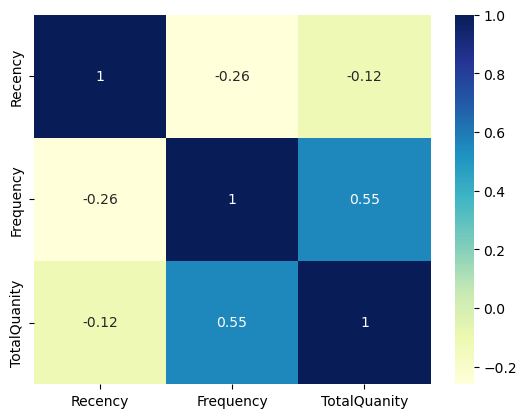

In [30]:
print(rfm_df.corr())
sns.heatmap(rfm_df.corr(),cmap="YlGnBu",annot=True)

In [31]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_df = pd.DataFrame(pt.fit_transform(rfm_df))
rfm_df.columns = features
rfm_df.head()

,Recency,Frequency,TotalQuanity
0,7.216450e-16,-1.158092,3.193082
1,-3.330669e-16,1.202204,1.377477
2,-5.551115e-17,0.661012,0.745038
3,-2.775558e-16,-1.158092,0.728345
4,6.106227e-16,-1.158092,-0.592290


Conclusion
To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like K-means clustering, Logistic Regression and Recommendation Engines to produce better informative results on customer behavior.

We will go for K-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement.

PCA


Applying PCA to reduce the the dimensions and the correlation between Frequency and Monetary features.

In [32]:
sc = StandardScaler()
rfm_scaled = sc.fit_transform(rfm_df)
rfm_scaled

array([[ 2.35428182, -1.15809198,  3.19308246],
       [-1.00279416,  1.20220365,  1.37747719],
       [-0.11935311,  0.66101158,  0.74503797],
       ...,
       [-0.82610595, -0.19547892, -1.13700823],
       [-1.00279416,  1.75054386,  0.858842  ],
       [-0.47272953,  0.3275373 ,  0.76148119]])

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca_tranformed_data = pca.fit_transform(rfm_scaled)

In [34]:
pca.components_

array([[ 0.50021436, -0.62217616, -0.6022312 ],
       [-0.85885428, -0.26794099, -0.43655119],
       [ 0.11024932,  0.73559802, -0.66838659]])

In [35]:
pca.explained_variance_

array([2.18033038, 0.6129895 , 0.20737168])

In [36]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.72660929, 0.20428274, 0.06910796])

Model Training

In [37]:
X = rfm_df.copy()
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(df_pca)
df_pca.head(5)

,0,1
0,-1.438956,-3.076745
1,-1.824110,-0.123937
2,-0.994227,-0.059416
3,0.303877,-1.333913
4,1.237707,-0.400083


K-Means Clustering

In [38]:
X = df_pca.copy()

In [39]:
from sklearn.cluster import KMeans 

cluster_range = range(1, 15)
cluster_errors = []
cluster_sil_scores = []

for num in cluster_range: 
    clusters = KMeans(num, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)
    # capture the cluster lables
    labels = clusters.labels_  
    # capture the centroids
    centroids = clusters.cluster_centers_ 
    # capture the intertia
    cluster_errors.append( clusters.inertia_ )    
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,8678.000000
1,2,3167.406531
2,3,2006.354232
3,4,1574.253188
4,5,1182.757573
5,6,1001.370729
6,7,858.942916
7,8,750.744688
8,9,666.428165
9,10,582.988508


Text(0, 0.5, 'error')

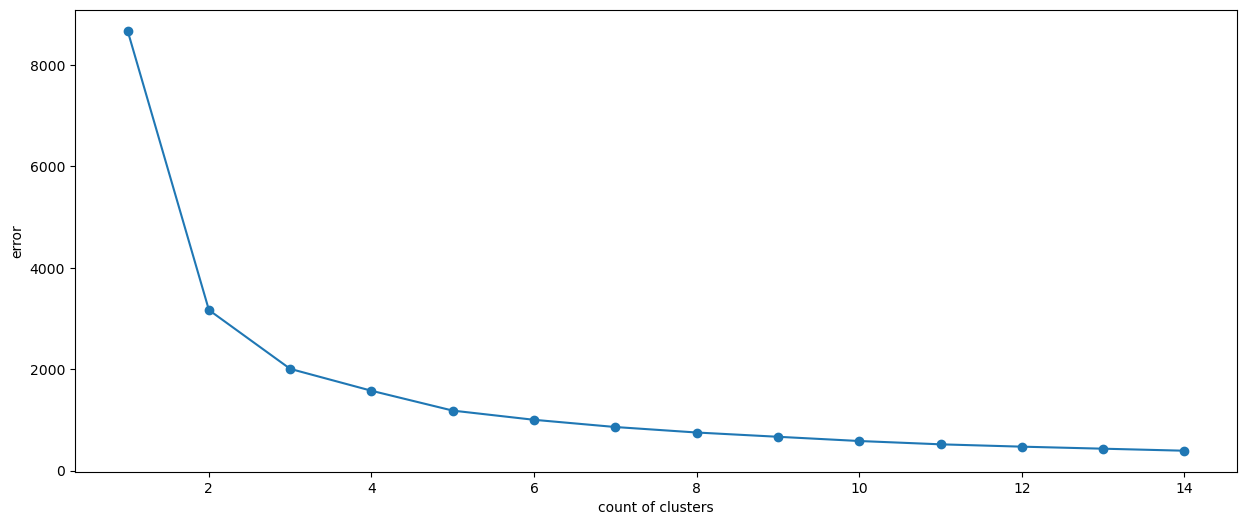

In [40]:
plt.figure(figsize=(15,6))
plt.plot(clusters_df["num_clusters"],clusters_df["cluster_errors"],marker = 'o')
plt.xlabel('count of clusters')
plt.ylabel('error')

In [41]:
for num in range(2,16):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(df_pca)
    
    sil_avg = silhouette_score(df_pca, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 The Silhouette Score is = 0.5316173538263568


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 3 The Silhouette Score is = 0.4693803387603499


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 The Silhouette Score is = 0.44898330826893523


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 The Silhouette Score is = 0.4362040830376901


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 The Silhouette Score is = 0.42830129932385513


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 The Silhouette Score is = 0.4355180376875619


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 The Silhouette Score is = 0.4393227052344725


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 The Silhouette Score is = 0.4448248067924804


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 10 The Silhouette Score is = 0.43730324136539156


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 11 The Silhouette Score is = 0.4439230102899896


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 12 The Silhouette Score is = 0.4413805303536949


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 13 The Silhouette Score is = 0.4367878905959487


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 14 The Silhouette Score is = 0.44397142187262023


C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 15 The Silhouette Score is = 0.44365694574461095


Inferences:
We observe from the elbow plot a sharp bend after the number of clusters increase by 2. Silhoutte Score is also the highest for 2 clusters.

But, there is also a significant reduce in cluster error as number of clusters increase from 2 to 4 and after 4, the reduction is not much.

So, we will choose n_clusters = 4 to properly segment our customers.

In [42]:
kmeans = KMeans(n_clusters = 6)
kmeans = kmeans.fit(df_pca)
labels = kmeans.predict(df_pca)
centroids = kmeans.cluster_centers_

print(labels)
print()
print('Cluster Centers')
print(centroids)

C:\n_users\jyothi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 3 ... 2 3 5]

Cluster Centers
[[ 1.07056582 -0.56722356]
 [-2.37814639 -0.06800714]
 [ 0.49972413  0.40625753]
 [-1.25951317  0.13617576]
 [ 1.83518174  0.21909488]
 [-0.26450202 -0.00624455]]


In [43]:
df_pca['Clusters'] = labels
df_pca.head()

,0,1,Clusters
0,-1.438956,-3.076745,1
1,-1.824110,-0.123937,1
2,-0.994227,-0.059416,3
3,0.303877,-1.333913,0
4,1.237707,-0.400083,0


In [44]:
df_pca['Clusters'].value_counts()

5    964
3    924
0    812
4    691
2    534
1    414
Name: Clusters, dtype: int64

Now we will use the models to find the number of clusters

In [45]:
df_pca.head(5)

,0,1,Clusters
0,-1.438956,-3.076745,1
1,-1.824110,-0.123937,1
2,-0.994227,-0.059416,3
3,0.303877,-1.333913,0
4,1.237707,-0.400083,0


In [46]:
X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# instantiate the model
dc=DecisionTreeClassifier()
knn=KNeighborsClassifier(1)
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[244   0   0   0   0   0]
 [  0 121   0   3   0   0]
 [  0   0 159   0   0   1]
 [  0   1   0 276   0   0]
 [  0   0   0   0 208   0]
 [  1   0   0   2   0 286]]


Accuracy of DecisionTreeClassifier: 99.38556067588326 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       0.99      0.98      0.98       124
           2       1.00      0.99      1.00       160
           3       0.98      1.00      0.99       277
           4       1.00      1.00      1.00       208
           5       1.00      0.99      0.99       289

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302



In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[244   0   0   0   0   0]
 [  0 121   0   3   0   0]
 [  0   0 159   0   0   1]
 [  0   1   0 276   0   0]
 [  0   0   0   0 208   0]
 [  1   0   0   2   0 286]]

True Positives(TP) =  244

True Negatives(TN) =  121

False Positives(FP) =  0

False Negatives(FN) =  0


KNN

In [48]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[244   0   0   0   0   0]
 [  1 121   0   2   0   0]
 [  0   0 160   0   0   0]
 [  0   4   0 271   0   2]
 [  0   0   0   0 208   0]
 [  1   0   1   0   0 287]]


Accuracy of K-NeighborsClassifier: 99.15514592933948 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       244
           1       0.97      0.98      0.97       124
           2       0.99      1.00      1.00       160
           3       0.99      0.98      0.99       277
           4       1.00      1.00      1.00       208
           5       0.99      0.99      0.99       289

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302



In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[244   0   0   0   0   0]
 [  1 121   0   2   0   0]
 [  0   0 160   0   0   0]
 [  0   4   0 271   0   2]
 [  0   0   0   0 208   0]
 [  1   0   1   0   0 287]]

True Positives(TP) =  244

True Negatives(TN) =  121

False Positives(FP) =  0

False Negatives(FN) =  1


Gaussian Naive Bayes Classifier

In [50]:
m2 = 'Naive Bayes'
gnb.fit(X_train,y_train)
nbpred = gnb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[242   0   0   0   0   2]
 [  0 123   0   1   0   0]
 [  0   0 141   0   4  15]
 [  0   1   0 274   0   2]
 [  0   0   0   0 208   0]
 [  0   0   0   4   0 285]]


Accuracy of Naive Bayes model: 97.7726574500768 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       244
           1       0.99      0.99      0.99       124
           2       1.00      0.88      0.94       160
           3       0.98      0.99      0.99       277
           4       0.98      1.00      0.99       208
           5       0.94      0.99      0.96       289

    accuracy                           0.98      1302
   macro avg       0.98      0.97      0.98      1302
weighted avg       0.98      0.98      0.98      1302



In [51]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,nbpred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[242   0   0   0   0   2]
 [  0 123   0   1   0   0]
 [  0   0 141   0   4  15]
 [  0   1   0 274   0   2]
 [  0   0   0   0 208   0]
 [  0   0   0   4   0 285]]

True Positives(TP) =  242

True Negatives(TN) =  123

False Positives(FP) =  0

False Negatives(FN) =  0


Conclusion


We saw that using classification models like Logisitc Regression, KNeighborsClassifier ,DecisionTree we predicted the clusters for customers using RFM dataset as independent variables and Cluster as the target variable. The clusters predicted by the classification models perfectly aligns with K-Means clustering. So, we can conclude that our clusters are correct.

Summary
The work described in this notebook is based on a database providing details on purchases made on an E-commerce platform over a period of one year. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date. In total, approximately ∼ 4000 clients appear in the database. Given the available information, I decided to develop a classifier that allows to anticipate the type of purchase that a customer will make, as well as the number of visits that he will make during a year, and this from its first visit to the E-commerce site.

The next part of the analysis consisted of some basic data visualization. This was done in order to get insights regarding the country which was using the E-commerce website the most. I used basic plots in order to show the results of my analysis. I also tried to analyse other important factors such as the Gross Purcahse by a country as well as which following description was used the most.
The final part of the analysis was the customer segmentation part. The main way to go around with this procces is to use the RFM (Recency, Frequency, Monetory) table to sort the customer in the groups. After creating the RFM table I used K-Means clustering (Elbow curve and Silhoutte scores) in order to create 4 clusters in which the customers should be Segmented. After each of the customers were segmented into their respective groups. I used models such as Logisitc Regression, KNeighborsClassifier ,DecisionTree in order the cross the accuracy of the clustering which resulted in an accuracy score 0.98. Hence, I conclude the customer segmentation was done which effective methods and high accuracy.